In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('/content/prostate.csv')
data.head()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa,Target
0,-0.579818,2.769459,50,-1.386294,-1.386294,6,0,-0.430783,0
1,-0.994252,3.319626,58,-1.386294,-1.386294,6,0,-0.162519,0
2,-0.510826,2.691243,74,-1.386294,-1.386294,7,20,-0.162519,0
3,-1.203973,3.282789,58,-1.386294,-1.386294,6,0,-0.162519,0
4,0.751416,3.432373,62,-1.386294,-1.386294,6,0,0.371564,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
#print(X)
print(y.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [11]:
y.value_counts()

,count
Target,
0,76
1,21


In [12]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [18]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[21  4]
 [ 3  2]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.33      0.40      0.36         5

    accuracy                           0.77        30
   macro avg       0.60      0.62      0.61        30
weighted avg       0.78      0.77      0.77        30



Elbow Method
Let’s go ahead and use the elbow method to pick a good K Value.

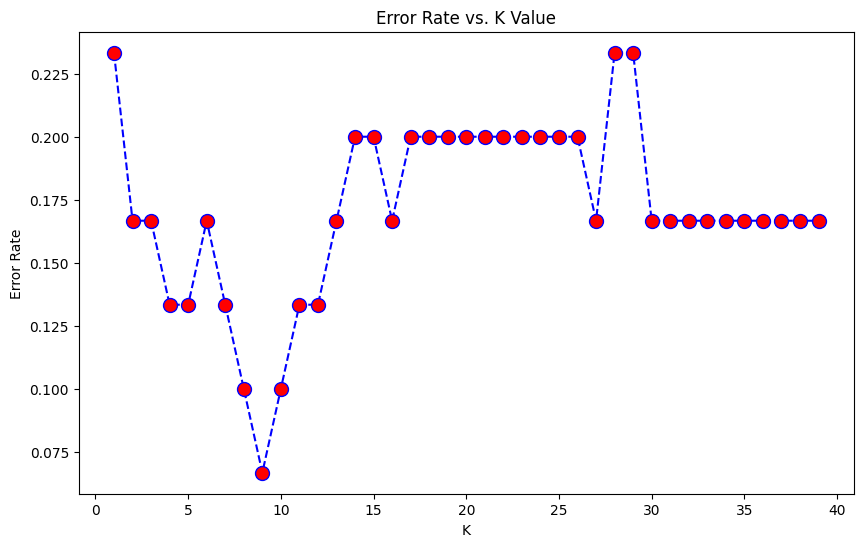

In [19]:
error_rate = []

# Will take some time
for i in range(1, 40):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(X_train, y_train)
	pred_i = knn.predict(X_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
		linestyle='dashed', marker='o',
		markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [25]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))
b1 = accuracy_score(y_test, pred)
print(b1*100)

WITH K = 1
Confusion Matrix
[[21  4]
 [ 3  2]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.33      0.40      0.36         5

    accuracy                           0.77        30
   macro avg       0.60      0.62      0.61        30
weighted avg       0.78      0.77      0.77        30

76.66666666666667


In [24]:
# NOW WITH K = 10
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))
b2 = accuracy_score(y_test, pred)
print(b2*100)


WITH K = 10
Confusion Matrix
[[23  2]
 [ 1  4]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.67      0.80      0.73         5

    accuracy                           0.90        30
   macro avg       0.81      0.86      0.83        30
weighted avg       0.91      0.90      0.90        30

90.0


In [22]:
b = accuracy_score(y_test, pred)
print(b*100)

90.0
